In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# reading csv file and assigning to dataset variable
dataset = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [3]:
# getting the overview of all the columns in the dataset
dataset.columns

Index(['Hours', 'Scores'], dtype='object')

In [4]:
dataset.rename(columns = {'Hours': 'study_hours', 'Scores': 'percentage_scores'}, inplace = True)
# getting brief overview of the dataset - number of columns and rows (shape of dataset), 
# columns names and its dtype, how many non-null values it has and memory usage.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   study_hours        25 non-null     float64
 1   percentage_scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [5]:
dataset['study_hours'] = dataset['study_hours'].astype('float32')
dataset['percentage_scores'] = dataset['percentage_scores'].astype('float32')
# rechecking the columns dtype
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   study_hours        25 non-null     float32
 1   percentage_scores  25 non-null     float32
dtypes: float32(2)
memory usage: 332.0 bytes


In [6]:
# first 5 rows content of the dataset
dataset.head()

,study_hours,percentage_scores
0,2.5,21.0
1,5.1,47.0
2,3.2,27.0
3,8.5,75.0
4,3.5,30.0


In [7]:
# shape of dataset
dataset.shape

(25, 2)

In [8]:
# finding missing values
dataset.isnull().sum()


study_hours          0
percentage_scores    0
dtype: int64

In [9]:
# finding any duplicates records in the dataset
dataset.duplicated().sum()

0

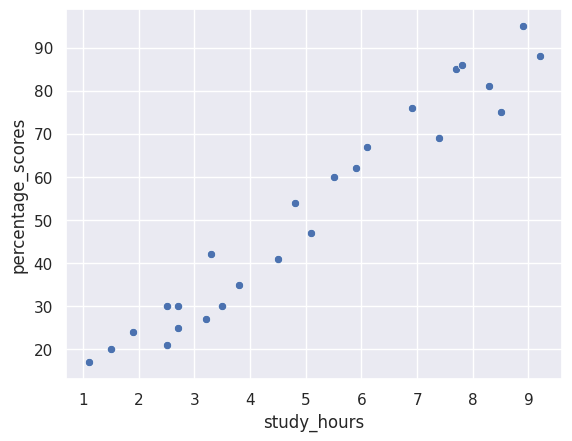

In [10]:
# plotting the the relationship between percentage_scores and study_hours
sns.set(style = 'darkgrid')
sns.scatterplot(x = 'study_hours', y = 'percentage_scores', data = dataset)
plt.show()

In [11]:
# importing the libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# initializing the X (independent variables / study_hours) and y (dependent variable / percentage_scores)
X = dataset.drop('percentage_scores', axis = 1)
y = dataset['percentage_scores']
# splitting X and y into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
# finding the shape of X_train, X_test, y_train, y_test
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20, 1), (5, 1), (20,), (5,))

In [12]:
# creating object of our LinearRegression model and assigning to a variable model
model = LinearRegression()
# training our LinearRegression model
model.fit(X_train, y_train)

LinearRegression()

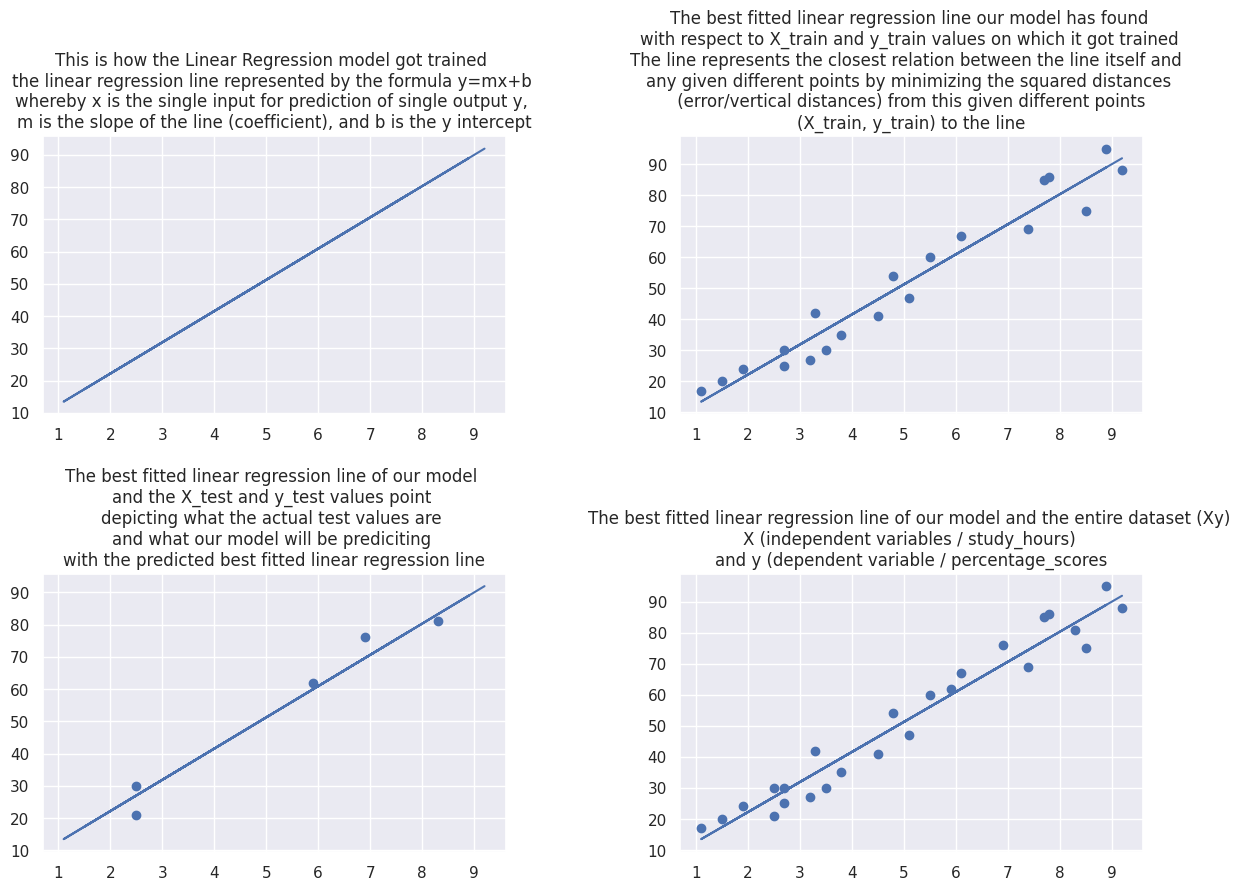

In [13]:
line = model.coef_ * X_train + model.intercept_ # y = mx + b
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (14, 10)) # 2 rows and 2 columns subplots
fig.tight_layout(pad = 7.5) # padding/space between each subplots


ax[0, 0].set_title('This is how the Linear Regression model got trained \n' 
                   'the linear regression line represented by the formula y=mx+b \n'
                   'whereby x is the single input for prediction of single output y, \n' 
                   'm is the slope of the line (coefficient), and b is the y intercept')
ax[0, 0].plot(X_train, line)


ax[0, 1].set_title('The best fitted linear regression line our model has found \n' 
                   'with respect to X_train and y_train values on which it got trained \n'
                   'The line represents the closest relation between the line itself and  \n'
                   'any given different points by minimizing the squared distances \n '
                   '(error/vertical distances) from this given different points \n'
                   '(X_train, y_train) to the line')
ax[0, 1].scatter(X_train, y_train)            
ax[0, 1].plot(X_train, line)


ax[1, 0].set_title('The best fitted linear regression line of our model \n'
                   'and the X_test and y_test values point \n'
                   'depicting what the actual test values are \n'
                   'and what our model will be prediciting \n'
                   'with the predicted best fitted linear regression line')
ax[1, 0].scatter(X_test, y_test)            
ax[1, 0].plot(X_train, line)


ax[1, 1].set_title('The best fitted linear regression line of our model and the entire dataset (Xy) \n'
                   'X (independent variables / study_hours) \n'
                   'and y (dependent variable / percentage_scores')
ax[1, 1].scatter(X, y)            
ax[1, 1].plot(X_train, line)


plt.show()

In [14]:
# predicting the percentage_scores for X_test
pred = model.predict(X_test)
# comparing Actual vs Predicted
prediction_data = pd.DataFrame({'test_studyhours': X_test['study_hours'], 'actual_percentscores': y_test, 'predicted_percentscores': pred})  
prediction_data

,test_studyhours,actual_percentscores,predicted_percentscores
8,8.3,81.0,83.188141
16,2.5,30.0,27.032085
0,2.5,21.0,27.032085
23,6.9,76.0,69.633232
11,5.9,62.0,59.951153


In [15]:
r2_score(y_test, pred)

0.9678055611214291

In [16]:
# evaluating the performance of the model

# MAE
print('MAE:')
print(mean_absolute_error(y_test, pred))

#MSE
print('MSE:')
print(mean_squared_error(y_test, pred))

#RMSE
print('RMSE:')
print(np.sqrt(mean_squared_error(y_test, pred)))

MAE:
3.920751
MSE:
18.943209
RMSE:
4.35238


In [17]:
hours = pd.DataFrame({'study_hours': [9.25]})
unseenpred = model.predict(hours)
print("No of Hours = {}".format(hours['study_hours'][0]))
print("Predicted Score = {}".format(unseenpred[0]))

No of Hours = 9.25
Predicted Score = 92.38611388206482
